In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
## Base values
##n_source_implant_energy = 130 keV
## pt_implant_energy = 300 keV
## time_gox = 60 min
## Vt_dose = 2e12 atom/cm^2
## n_source_implant_dose = 5e15
## pt_dose = 3e12

##Values that you can use, im already using the seaborn-whitegrid, so yall can maybe use smth else? just replace the value in plt.style.use("") to whatever fits yall
###['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']

##optimized_n_val = 220 keV and 3e12
##optimized_pt_val = remains same as base
##Wafer 



## TODO
## Compare and identify Ion/Ioff for various given Gox_time and Vt_dose [X]
## Retrieve most optimal high Ion/Off ratio and low Vt_Rolloff and VDibl [X]
## Retrieve Voltage vs Current data (to compare with that of data.xlsx) [X]
## After above, optimize based on n+ source and drain implant energy and dosage [X]
## After above, optimized based on PT implant energy and dosage [X]
## Report []

In [2]:
csv_data = pd.read_csv("EE4613_Assignment_Data.csv")
key = csv_data.loc[0].to_list()
csv_data.columns = key
csv_data.drop([0,1,2], axis = 0, inplace = True)
csv_data.reset_index(inplace = True)
for columns in csv_data:
    csv_data[columns] = csv_data[columns].apply(pd.to_numeric, errors = "ignore")

In [3]:
csv_data["OnOffRatio"] = csv_data["Ion"]/csv_data["Ioffs"]
csv_data

,index,Parameter,Vt_dose,Bmax_act,Bsur_act,Time_gox,tox_gn,xj_nch,Bmax_nch,Bsur_nch,...,St0,Sts,Gms,Gds,Vdibl,Ronoff,Icrit,Av,dSt,OnOffRatio
0,3,Wafer 1,2.000000e+12,1.880000e+17,1.950000e+16,10,0.010595,0.356951,1.020000e+17,1.830000e+16,...,80.0,80.7,0.000040,0.000001,0.00154,1.990000e+08,2.720000e-08,27.60,0.8040,1.996830e+08
1,4,Wafer 2,2.000000e+12,1.880000e+17,1.950000e+16,10,0.010595,0.356951,1.020000e+17,1.830000e+16,...,79.9,80.3,0.000074,0.000004,0.00123,1.750000e+08,5.440000e-08,18.30,0.4000,1.760563e+08
2,5,Wafer 3,2.000000e+12,1.880000e+17,1.950000e+16,10,0.010595,0.356951,1.020000e+17,1.830000e+16,...,79.6,79.6,0.000148,0.000040,0.00138,8.360000e+07,1.290000e-07,3.71,0.0258,8.358434e+07
3,6,Wafer 4,2.000000e+12,1.880000e+17,1.950000e+16,10,0.010595,0.356951,1.020000e+17,1.830000e+16,...,79.2,79.0,0.000177,0.000051,0.00462,5.130000e+07,1.520000e-07,3.51,-0.3110,5.113636e+07
4,7,Wafer 5,2.000000e+12,1.880000e+17,1.950000e+16,10,0.010595,0.356951,1.020000e+17,1.830000e+16,...,78.6,77.4,0.000216,0.000059,0.01440,2.020000e+07,2.270000e-07,3.68,-1.4400,2.016588e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,157,Wafer 156,8.000000e+12,7.520000e+17,7.800000e+16,120,0.047676,0.306405,2.090000e+17,2.980000e+16,...,186.0,188.0,0.000032,0.000004,0.04210,3.160000e+09,1.040000e-07,7.72,1.2400,3.151042e+09
155,158,Wafer 157,8.000000e+12,7.520000e+17,7.800000e+16,120,0.047676,0.306405,2.090000e+17,2.980000e+16,...,179.0,183.0,0.000044,0.000012,0.07920,4.990000e+09,1.620000e-07,3.55,2.1200,5.000000e+09
156,159,Wafer 158,8.000000e+12,7.520000e+17,7.800000e+16,120,0.047676,0.306405,2.090000e+17,2.980000e+16,...,184.0,175.0,0.000053,0.000013,0.16000,6.500000e+09,2.410000e-07,4.12,-5.0800,6.476684e+09
157,160,Wafer 159,8.000000e+12,7.520000e+17,7.800000e+16,120,0.047676,0.306405,2.090000e+17,2.980000e+16,...,183.0,171.0,0.000057,0.000017,0.29000,7.770000e+09,3.230000e-07,3.35,-6.3800,7.794872e+09


In [4]:
csv_data.drop("index", axis = 1, inplace = True)

In [5]:
vt_dose_data = csv_data["Vt_dose"].unique()
gox_time_data = csv_data["Time_gox"].unique()

csv_data.columns


Index(['Parameter', 'Vt_dose', 'Bmax_act', 'Bsur_act', 'Time_gox', 'tox_gn',
       'xj_nch', 'Bmax_nch', 'Bsur_nch', 'Lg', 'Vt0', 'Vts', 'Ion', 'Ioffs',
       'St0', 'Sts', 'Gms', 'Gds', 'Vdibl', 'Ronoff', 'Icrit', 'Av', 'dSt',
       'OnOffRatio'],
      dtype='object')

In [6]:
lc_data = csv_data[csv_data["Lg"] == 10]
sc_data = csv_data[csv_data["Lg"] == 1]

In [7]:
lc_data = lc_data.drop(64)
lc_data.reset_index(inplace = True)
sc_data.reset_index(inplace = True)
lc_data = lc_data.drop("index", axis = 1)
sc_data = sc_data.drop("index", axis = 1)

In [8]:
lc_data

,Parameter,Vt_dose,Bmax_act,Bsur_act,Time_gox,tox_gn,xj_nch,Bmax_nch,Bsur_nch,Lg,...,St0,Sts,Gms,Gds,Vdibl,Ronoff,Icrit,Av,dSt,OnOffRatio
0,Wafer 1,2.000000e+12,1.880000e+17,1.950000e+16,10,0.010595,0.356951,1.020000e+17,1.830000e+16,10.0,...,80.0,80.7,0.000040,1.460000e-06,0.00154,1.990000e+08,2.720000e-08,27.6,0.8040,1.996830e+08
1,Wafer 9,2.000000e+12,1.880000e+17,1.950000e+16,30,0.019968,0.340180,9.840000e+16,1.330000e+16,10.0,...,94.6,94.2,0.000027,6.810000e-07,0.00335,2.060000e+09,2.010000e-08,39.7,-0.4330,2.057402e+09
2,Wafer 17,2.000000e+12,1.880000e+17,1.950000e+16,60,0.030253,0.318284,9.390000e+16,1.020000e+16,10.0,...,109.0,109.0,0.000018,3.580000e-07,0.00276,1.700000e+09,1.650000e-08,50.6,0.0378,1.700855e+09
3,Wafer 25,2.000000e+12,1.880000e+17,1.950000e+16,90,0.039254,0.313851,8.990000e+16,8.510000e+15,10.0,...,122.0,122.0,0.000013,2.780000e-07,0.00991,1.230000e+09,1.450000e-08,46.7,-0.0791,1.227907e+09
4,Wafer 33,2.000000e+12,1.880000e+17,1.950000e+16,120,0.047684,0.309289,8.630000e+16,7.490000e+15,10.0,...,135.0,135.0,0.000010,1.650000e-07,0.01470,1.000000e+09,1.360000e-08,60.8,-0.3270,1.000000e+09
5,Wafer 41,4.000000e+12,3.760000e+17,3.900000e+16,10,0.010595,0.355646,1.620000e+17,3.660000e+16,10.0,...,80.0,80.7,0.000034,9.570000e-07,-0.01460,1.090000e+09,2.820000e-08,35.7,0.8150,1.090147e+09
6,Wafer 49,4.000000e+12,3.760000e+17,3.900000e+16,30,0.019968,0.336026,1.440000e+17,2.650000e+16,10.0,...,106.0,105.0,0.000022,4.920000e-07,0.00335,2.200000e+09,2.140000e-08,44.1,-0.2280,2.199153e+09
7,Wafer 57,4.000000e+12,3.760000e+17,3.900000e+16,60,0.030252,0.318077,1.270000e+17,2.040000e+16,10.0,...,127.0,127.0,0.000013,2.020000e-07,0.01980,1.300000e+09,1.770000e-08,66.4,0.3390,1.304762e+09
8,Wafer 73,4.000000e+12,3.760000e+17,3.900000e+16,120,0.047681,0.308302,1.060000e+17,1.490000e+16,10.0,...,155.0,155.0,0.000007,7.550000e-08,0.02670,6.520000e+08,1.510000e-08,88.9,0.1880,6.529412e+08
9,Wafer 81,6.000000e+12,5.640000e+17,5.850000e+16,10,0.010594,0.354575,2.400000e+17,5.530000e+16,10.0,...,84.4,85.0,0.000031,4.570000e-07,-0.00628,2.170000e+09,2.890000e-08,67.7,0.8100,2.163972e+09


In [9]:
vt_rolloff = lc_data["Vt0"] - sc_data["Vt0"]

vt_ro_data = pd.DataFrame([sc_data["Vt_dose"], sc_data["Time_gox"], vt_rolloff])

#vt_rolloff
vt_ro_data = vt_ro_data.transpose()
constant_dose_vt_ro = vt_ro_data[vt_ro_data["Vt_dose"] == 2e+12]
constant_time_vt_ro = vt_ro_data[vt_ro_data["Time_gox"] == 60]


In [10]:
constant_dose_data = csv_data[csv_data["Vt_dose"] == 2.00E+12]
constant_time_data = csv_data[csv_data["Time_gox"] == 60]
constant_dose_data_lc = constant_dose_data[constant_dose_data["Lg"] == 10]
constant_dose_data_sc = constant_dose_data[constant_dose_data["Lg"] == 1]
constant_time_data_lc = constant_time_data[constant_time_data["Lg"] == 10]
constant_time_data_sc = constant_time_data[constant_time_data["Lg"] == 1]


In [11]:
def plot (x, y, line_of_best_fit,x_label, y_label, x_log, y_log, title, save_name):
    m,b = np.polyfit(np.array(x, dtype=float), np.array(y,dtype=float), 1)
    plt.style.use('seaborn-whitegrid')
    plt.plot(x,y, "-ok")
    if line_of_best_fit:
        plt.plot(x, m*x+b, "--", label = "Line of best fit")
    plt.legend()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if x_log:
        plt.xscale("log")
    if y_log:
        plt.yscale("log")
    plt.title(title)
    plt.show()
    if save_name:
        plt.savefig(save_name + "png")
    return

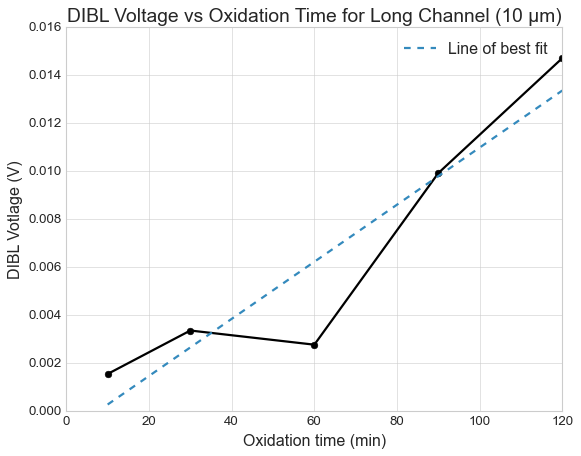

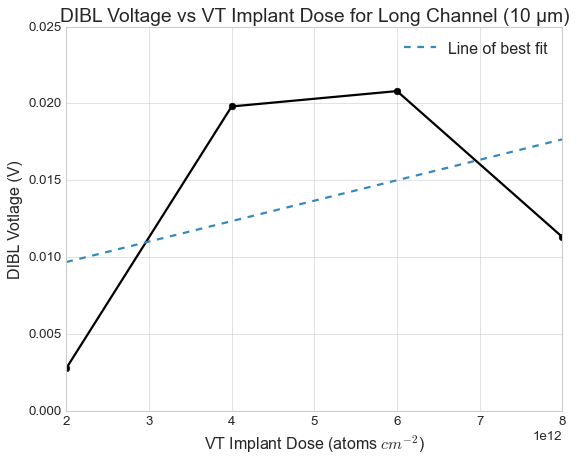

No handles with labels found to put in legend.


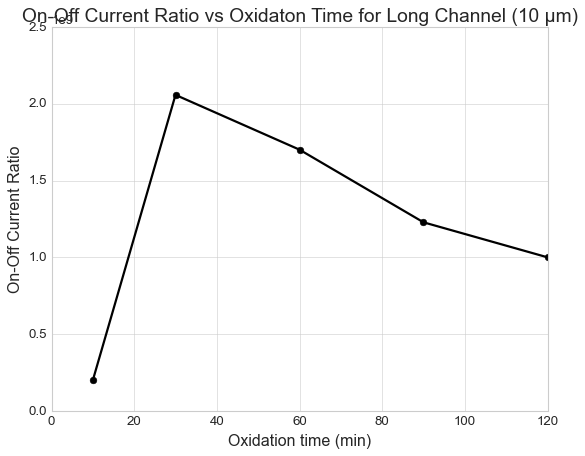

No handles with labels found to put in legend.


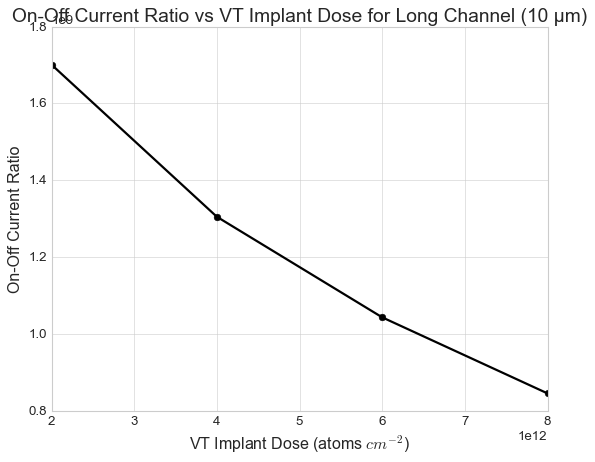

In [73]:
plot(constant_dose_data_lc["Time_gox"], constant_dose_data_lc["Vdibl"], True, "Oxidation time (min)", "DIBL Votlage (V)", False, False, "DIBL Voltage vs Oxidation Time for Long Channel (10 µm)", "")
plot(constant_time_data_lc["Vt_dose"], constant_time_data_lc["Vdibl"], True, "VT Implant Dose (atoms $cm^{-2}$)", "DIBL Votlage (V)", False, False, "DIBL Voltage vs VT Implant Dose for Long Channel (10 µm)", "")
plot(constant_dose_data_lc["Time_gox"], constant_dose_data_lc["OnOffRatio"], False, "Oxidation time (min)", "On-Off Current Ratio", False, False, "On-Off Current Ratio vs Oxidaton Time for Long Channel (10 µm)", "")
plot(constant_time_data_lc["Vt_dose"], constant_time_data_lc["OnOffRatio"], False, "VT Implant Dose (atoms $cm^{-2}$)", "On-Off Current Ratio", False, False, "On-Off Current Ratio vs VT Implant Dose for Long Channel (10 µm)", "")


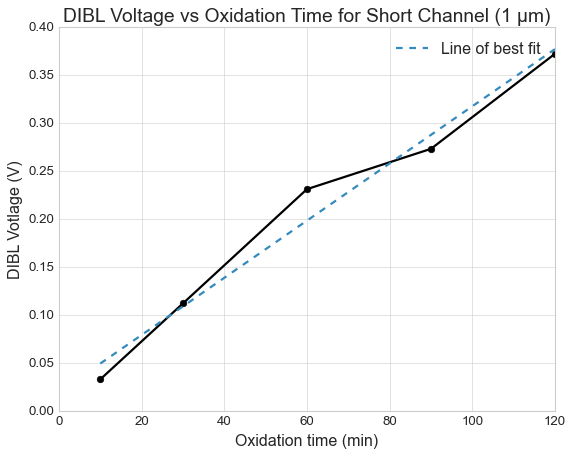

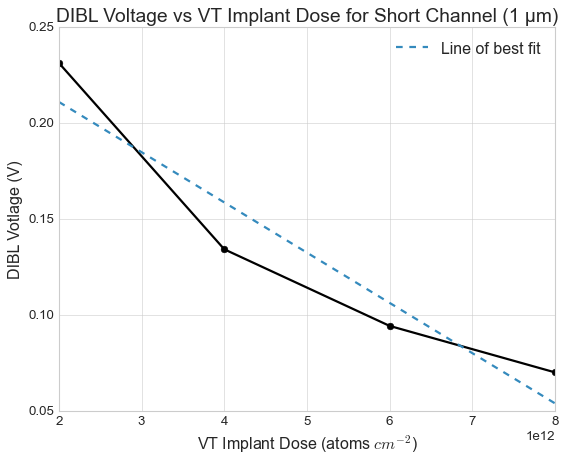

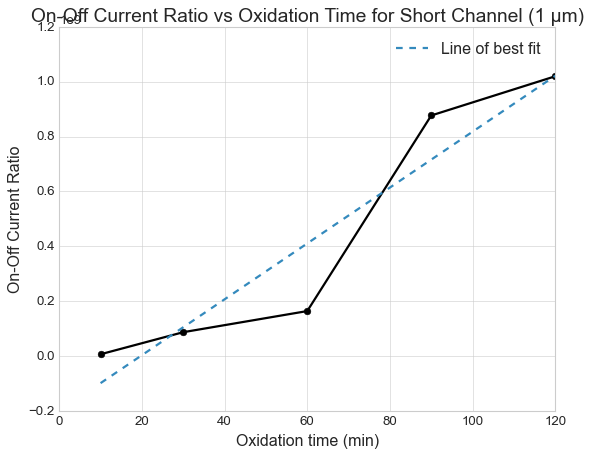

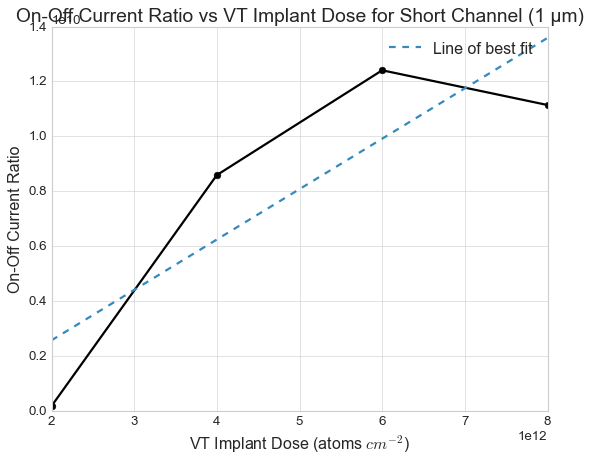

In [72]:
plot(constant_dose_data_sc["Time_gox"], constant_dose_data_sc["Vdibl"] , True, "Oxidation time (min)", "DIBL Votlage (V)", False, False, "DIBL Voltage vs Oxidation Time for Short Channel (1 µm)", "")
plot(constant_time_data_sc["Vt_dose"], constant_time_data_sc["Vdibl"], True, "VT Implant Dose (atoms $cm^{-2}$)", "DIBL Votlage (V)", False, False, "DIBL Voltage vs VT Implant Dose for Short Channel (1 µm)", "")
plot(constant_dose_data_sc["Time_gox"], constant_dose_data_sc["OnOffRatio"] , True, "Oxidation time (min)", "On-Off Current Ratio", False, False, "On-Off Current Ratio vs Oxidation Time for Short Channel (1 µm)", "")
plot(constant_time_data_sc["Vt_dose"], constant_time_data_sc["OnOffRatio"], True, "VT Implant Dose (atoms $cm^{-2}$)", "On-Off Current Ratio", False, False, "On-Off Current Ratio vs VT Implant Dose for Short Channel (1 µm)", "")


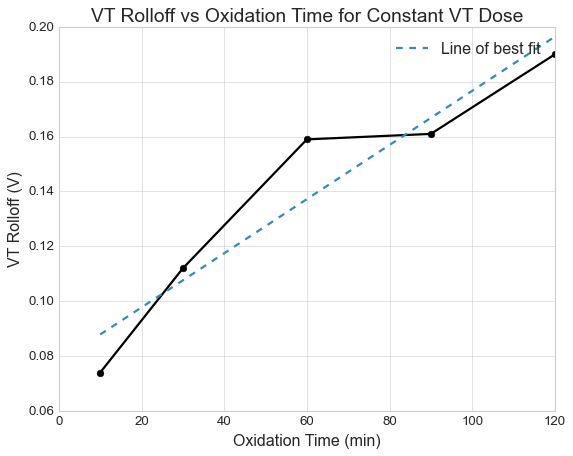

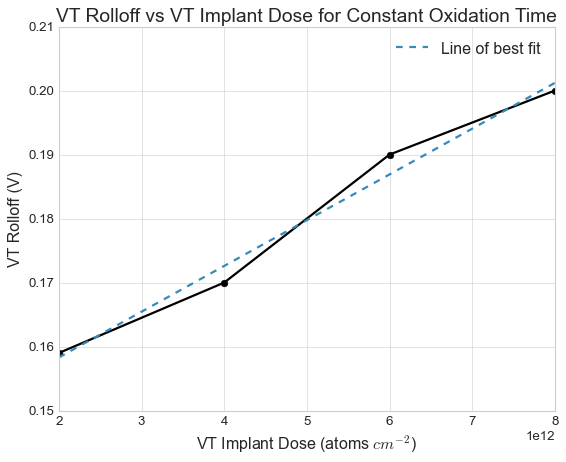

In [31]:
plot(constant_dose_vt_ro["Time_gox"], constant_dose_vt_ro["Vt0"], True, "Oxidation Time (min)", "VT Rolloff (V)", False, False, "VT Rolloff vs Oxidation Time for Constant VT Dose", "")
plot(constant_time_vt_ro["Vt_dose"], constant_time_vt_ro["Vt0"], True, "VT Implant Dose (atoms $cm^{-2}$)", "VT Rolloff (V)", False, False, "VT Rolloff vs VT Implant Dose for Constant Oxidation Time", "")


In [15]:
optimized_data_one = csv_data[(csv_data["Time_gox"] == 30) & (csv_data["Vt_dose"] == 6.00e+12)]
optimized_data_two = csv_data[(csv_data["Time_gox"] == 30) & (csv_data["Vt_dose"] ==  4.00e+12)]
base_data =  csv_data[(csv_data["Time_gox"] == 60) & (csv_data["Vt_dose"] ==  2.00e+12)]

No handles with labels found to put in legend.


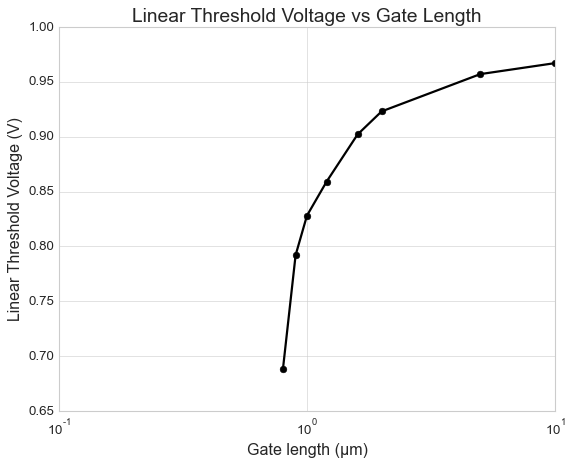

No handles with labels found to put in legend.


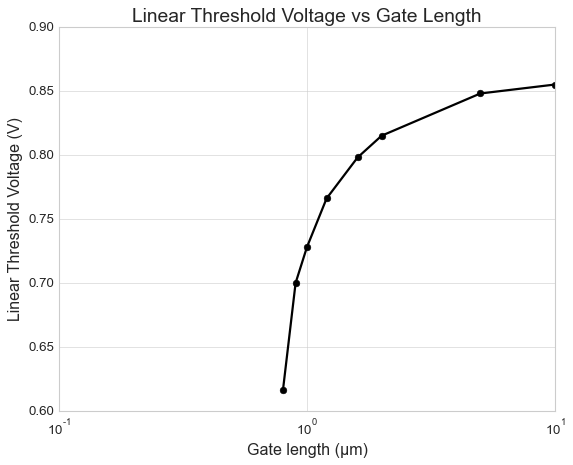

No handles with labels found to put in legend.


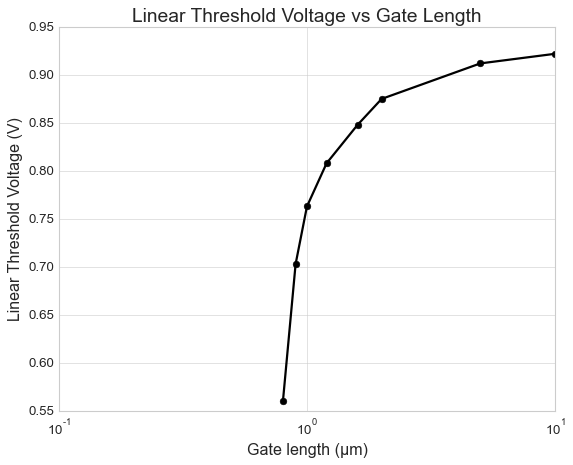

In [32]:
plot(optimized_data_one["Lg"], optimized_data_one["Vt0"], False, "Gate length (µm)", "Linear Threshold Voltage (V)", True, False, "Linear Threshold Voltage vs Gate Length", "")
plot(optimized_data_two["Lg"], optimized_data_two["Vt0"], False, "Gate length (µm)", "Linear Threshold Voltage (V)", True, False, "Linear Threshold Voltage vs Gate Length", "")
plot(base_data["Lg"], base_data["Vt0"], False, "Gate length (µm)", "Linear Threshold Voltage (V)", True, False, "Linear Threshold Voltage vs Gate Length", "")

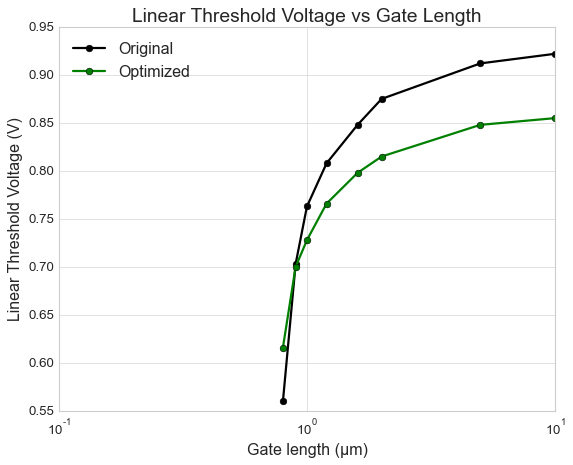

In [34]:

plt.style.use('seaborn-whitegrid')
plt.plot(base_data["Lg"], base_data["Vt0"], "-ok", label = "Original")
#plt.plot(optimized_data_one["Lg"], optimized_data_one["Vt0"], "-ro", label = "Optimized 1")
plt.plot(optimized_data_two["Lg"], optimized_data_two["Vt0"], "-go", label = "Optimized")
plt.legend(loc = "upper left")
plt.xlabel("Gate length (µm)")
plt.ylabel("Linear Threshold Voltage (V)")
plt.xscale("log")
#plt.yscale("log")
plt.title("Linear Threshold Voltage vs Gate Length")
plt.show()



In [18]:
small_channel_device = csv_data[csv_data["Lg"] == 1]
long_channel_device = csv_data[csv_data["Lg"] == 10]
scd_vt = pd.DataFrame(data = [small_channel_device["Vt_dose"],small_channel_device["Time_gox"],small_channel_device["Vt0"], small_channel_device["OnOffRatio"],small_channel_device["Vdibl"]]).transpose()
lcd_vt = pd.DataFrame(data = [long_channel_device["Vt_dose"],long_channel_device["Time_gox"],long_channel_device["Vt0"], long_channel_device["OnOffRatio"],long_channel_device["Vdibl"]]).transpose()
lcd_vt = lcd_vt.drop(64)


In [19]:
lcd_vt = lcd_vt.reset_index().drop("index", axis = 1)

In [20]:
scd_vt = scd_vt.reset_index().drop("index", axis = 1)

In [21]:
key_data = pd.concat([lcd_vt, scd_vt], axis=1, join="inner")
key_data.columns = ["Vt_dose", "Time_Gox", "Vt0_10", "OnOffRatio_10", "Vdibl_10", "pepeg", "pepeg", "Vt0_0", "OnOffRatio_0", "Vdibl_0"]
key_data = key_data.drop(["pepeg", "pepeg"], axis = 1)
key_data["Vt_rolloff"] = key_data["Vt0_10"] - key_data["Vt0_0"]
key_data
##Picked 4e12-30 and 6e12-30

,Vt_dose,Time_Gox,Vt0_10,OnOffRatio_10,Vdibl_10,Vt0_0,OnOffRatio_0,Vdibl_0,Vt_rolloff
0,2.000000e+12,10.0,0.377,1.996830e+08,0.00154,0.303,6.643836e+06,0.032900,0.074
1,2.000000e+12,30.0,0.648,2.057402e+09,0.00335,0.536,8.707386e+07,0.112000,0.112
2,2.000000e+12,60.0,0.922,1.700855e+09,0.00276,0.763,1.640625e+08,0.231000,0.159
3,2.000000e+12,90.0,1.140,1.227907e+09,0.00991,0.979,8.771429e+08,0.273000,0.161
4,2.000000e+12,120.0,1.340,1.000000e+09,0.01470,1.150,1.020080e+09,0.372000,0.190
5,4.000000e+12,10.0,0.491,1.090147e+09,-0.01460,0.397,9.139908e+07,0.022700,0.094
6,4.000000e+12,30.0,0.855,2.199153e+09,0.00335,0.728,2.154812e+09,0.056200,0.127
7,4.000000e+12,60.0,1.230,1.304762e+09,0.01980,1.060,8.585608e+09,0.134000,0.170
8,4.000000e+12,120.0,1.810,6.529412e+08,0.02670,1.590,1.016129e+10,0.254000,0.220
9,6.000000e+12,10.0,0.554,2.163972e+09,-0.00628,0.459,4.306358e+08,0.000114,0.095


In [22]:

##Most optimal seems to be 4e12 and 30
main_data =  pd.DataFrame(data = [key_data.iloc[2], key_data.iloc[6], key_data.iloc[10]])



In [65]:
new_df = optimized_data_two.drop([x for x in optimized_data_two.columns if x not in ["Lg", "Ion", "Ioffs", "OnOffRatio", "Vdibl", "Vt0"]], axis = 1)
new_df #4e12 and 30 min

,Lg,Vt0,Ion,Ioffs,Vdibl,OnOffRatio
48,10.0,0.855,0.000052,2.360000e-14,0.00335,2.199153e+09
49,5.0,0.848,0.000108,2.440000e-14,0.00652,4.426230e+09
50,2.0,0.815,0.000252,3.210000e-14,0.02070,7.850467e+09
51,1.6,0.798,0.000314,4.230000e-14,0.02450,7.423168e+09
52,1.2,0.766,0.000427,8.760000e-14,0.03350,4.874429e+09
53,1.0,0.728,0.000515,2.390000e-13,0.05620,2.154812e+09
54,0.9,0.700,0.000574,1.030000e-12,0.11700,5.572816e+08
55,0.8,0.616,0.000680,4.800000e-11,0.20100,1.416667e+07


In [74]:
ot_1_data = optimized_data_one.drop([x for x in optimized_data_one.columns if x not in ["Lg", "Ion", "Ioffs", "OnOffRatio", "Vdibl", "Vt0"]], axis = 1)
ot_1_data #6e12 and 30 min

,Lg,Vt0,Ion,Ioffs,Vdibl,OnOffRatio
87,10.0,0.967,0.000044,2.320000e-14,0.00480,1.905172e+09
88,5.0,0.957,0.000093,2.340000e-14,0.00362,3.957265e+09
89,2.0,0.923,0.000224,2.500000e-14,0.00324,8.960000e+09
90,1.6,0.902,0.000274,2.730000e-14,0.00989,1.003663e+10
91,1.2,0.859,0.000353,3.700000e-14,0.02940,9.540541e+09
92,1.0,0.828,0.000419,6.420000e-14,0.04690,6.526480e+09
93,0.9,0.792,0.000475,1.650000e-13,0.06500,2.878788e+09
94,0.8,0.688,0.000564,3.840000e-12,0.13600,1.468750e+08


In [66]:
new_df_2 = base_data.drop([x for x in base_data if x not in ["Lg", "Ion", "Ioffs", "OnOffRatio", "Vdibl", "Vt0"]], axis = 1)
new_df_2 #2e12 and 60 min

,Lg,Vt0,Ion,Ioffs,Vdibl,OnOffRatio
16,10.0,0.922,0.000040,2.340000e-14,0.00276,1.700855e+09
17,5.0,0.912,0.000085,2.400000e-14,0.00477,3.533333e+09
18,2.0,0.875,0.000215,2.870000e-14,0.01900,7.491289e+09
19,1.6,0.848,0.000271,3.690000e-14,0.04310,7.344173e+09
20,1.2,0.808,0.000354,1.310000e-13,0.10500,2.702290e+09
21,1.0,0.763,0.000420,2.560000e-12,0.23100,1.640625e+08
22,0.9,0.703,0.000484,1.770000e-10,0.36500,2.734463e+06
23,0.8,0.560,0.000601,8.490000e-06,0.56000,7.078916e+01


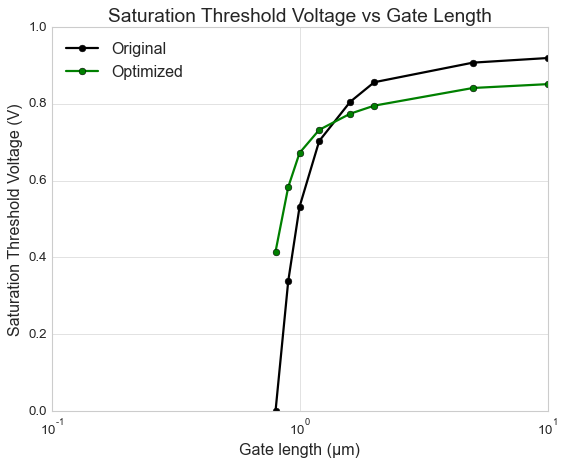

In [35]:
plt.style.use('seaborn-whitegrid')
plt.plot(base_data["Lg"], base_data["Vts"], "-ok", label = "Original")
#plt.plot(optimized_data_one["Lg"], optimized_data_one["Vt0"], "-ro", label = "Optimized 1")
plt.plot(optimized_data_two["Lg"], optimized_data_two["Vts"], "-go", label = "Optimized")
plt.legend(loc = "upper left")
plt.xlabel("Gate length (µm)")
plt.ylabel("Saturation Threshold Voltage (V)")
plt.xscale("log")
#plt.yscale("log")
plt.title("Saturation Threshold Voltage vs Gate Length")
plt.show()

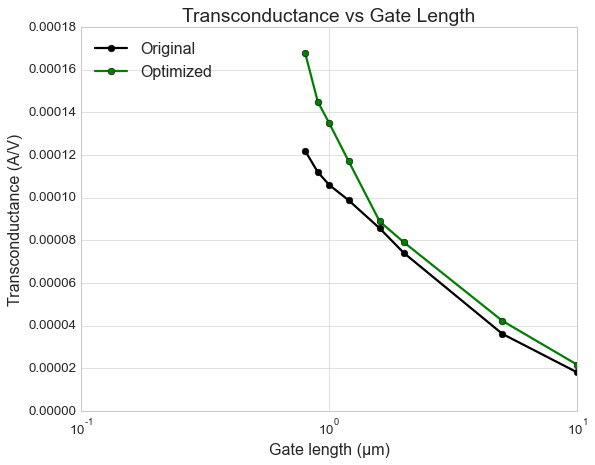

In [36]:
plt.style.use('seaborn-whitegrid')
plt.plot(base_data["Lg"], base_data["Gms"], "-ok", label = "Original")
#plt.plot(optimized_data_one["Lg"], optimized_data_one["Vt0"], "-ro", label = "Optimized 1")
plt.plot(optimized_data_two["Lg"], optimized_data_two["Gms"], "-go", label = "Optimized")
plt.legend(loc = "upper left")
plt.xlabel("Gate length (µm)")
plt.ylabel("Transconductance (A/V)")
plt.xscale("log")
#plt.yscale("log")
plt.title("Transconductance vs Gate Length")
plt.show()

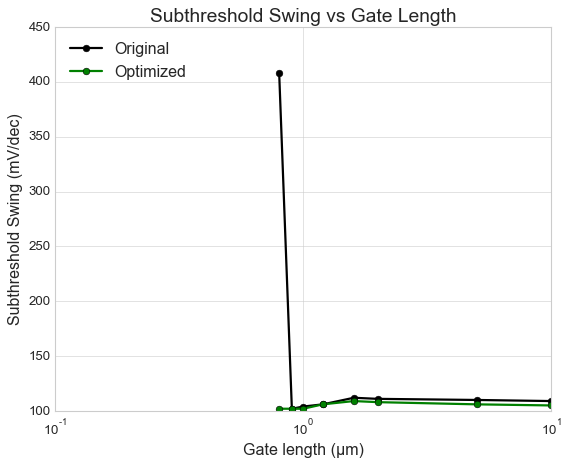

In [40]:
plt.style.use('seaborn-whitegrid')
plt.plot(base_data["Lg"], base_data["Sts"], "-ok", label = "Original")
#plt.plot(optimized_data_one["Lg"], optimized_data_one["Vt0"], "-ro", label = "Optimized 1")
plt.plot(optimized_data_two["Lg"], optimized_data_two["Sts"], "-go", label = "Optimized")
plt.legend(loc = "upper left")
plt.xlabel("Gate length (µm)")
plt.ylabel("Subthreshold Swing (mV/dec)")
plt.xscale("log")
#plt.yscale("log")
plt.title("Subthreshold Swing vs Gate Length")
plt.show()

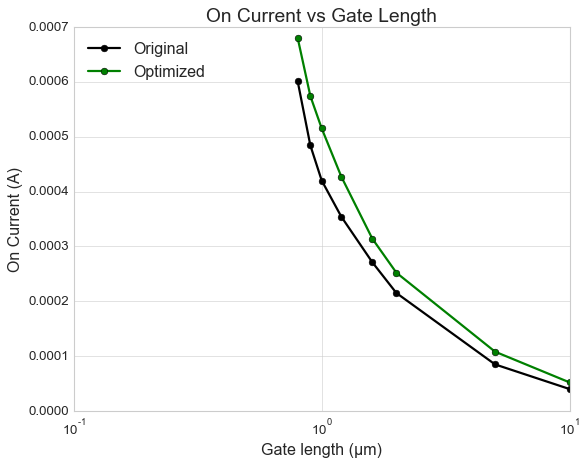

In [41]:
plt.style.use('seaborn-whitegrid')
plt.plot(base_data["Lg"], base_data["Ion"], "-ok", label = "Original")
#plt.plot(optimized_data_one["Lg"], optimized_data_one["Vt0"], "-ro", label = "Optimized 1")
plt.plot(optimized_data_two["Lg"], optimized_data_two["Ion"], "-go", label = "Optimized")
plt.legend(loc = "upper left")
plt.xlabel("Gate length (µm)")
plt.ylabel("On Current (A)")
plt.xscale("log")
#plt.yscale("log")
plt.title("On Current vs Gate Length")
plt.show()

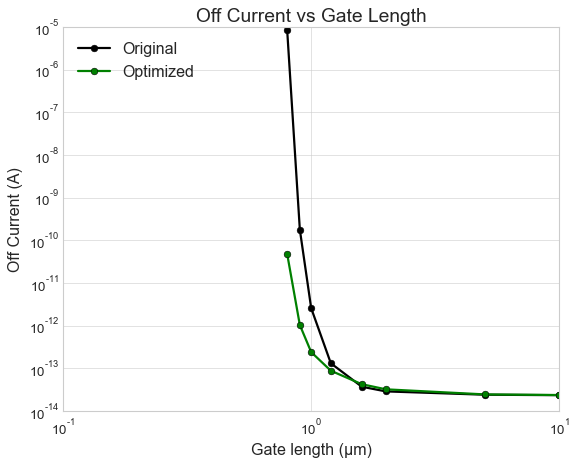

In [42]:
plt.style.use('seaborn-whitegrid')
plt.plot(base_data["Lg"], base_data["Ioffs"], "-ok", label = "Original")
#plt.plot(optimized_data_one["Lg"], optimized_data_one["Vt0"], "-ro", label = "Optimized 1")
plt.plot(optimized_data_two["Lg"], optimized_data_two["Ioffs"], "-go", label = "Optimized")
plt.legend(loc = "upper left")
plt.xlabel("Gate length (µm)")
plt.ylabel("Off Current (A)")
plt.xscale("log")
plt.yscale("log")
plt.title("Off Current vs Gate Length")
plt.show()

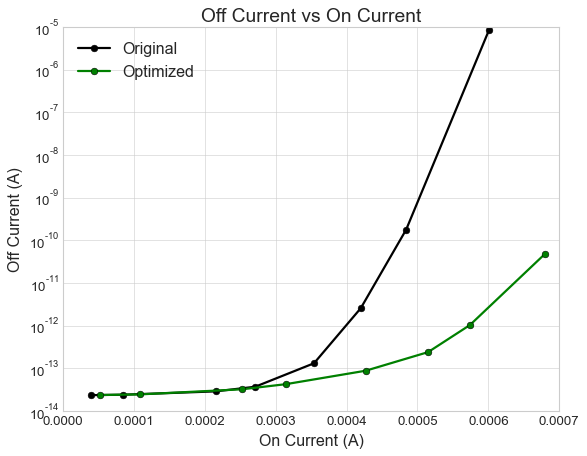

In [52]:
plt.style.use('seaborn-whitegrid')
plt.plot(base_data["Ion"], base_data["Ioffs"], "-ok", label = "Original")
#plt.plot(optimized_data_one["Lg"], optimized_data_one["Vt0"], "-ro", label = "Optimized 1")
plt.plot(optimized_data_two["Ion"], optimized_data_two["Ioffs"], "-go", label = "Optimized")
plt.legend(loc = "upper left")
plt.xlabel("On Current (A)")
plt.ylabel("Off Current (A)")
#plt.xscale("log")
plt.yscale("log")
plt.title("Off Current vs On Current")
plt.show()

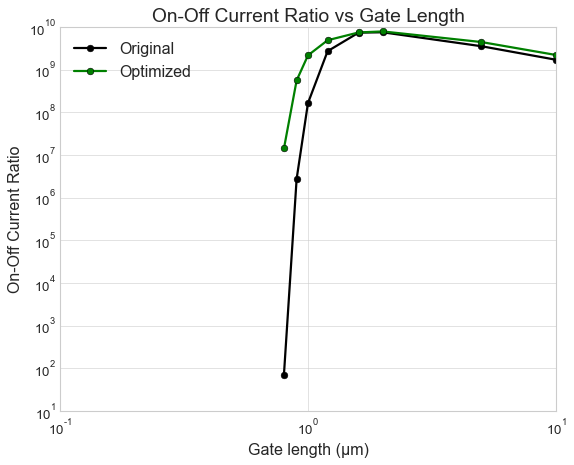

In [54]:
plt.style.use('seaborn-whitegrid')
plt.plot(base_data["Lg"], base_data["OnOffRatio"], "-ok", label = "Original")
#plt.plot(optimized_data_one["Lg"], optimized_data_one["Vt0"], "-ro", label = "Optimized 1")
plt.plot(optimized_data_two["Lg"], optimized_data_two["OnOffRatio"], "-go", label = "Optimized")
plt.legend(loc = "upper left")
plt.xlabel("Gate length (µm)")
plt.ylabel("On-Off Current Ratio")
plt.xscale("log")
plt.yscale("log")
plt.title("On-Off Current Ratio vs Gate Length")
plt.show()

For N+ source and drain simulation


In [58]:
n_data = pd.read_csv("n_plus_sim_data.csv")
key = n_data.loc[0].to_list()
n_data.columns = key
n_data.drop([0,1,2], axis = 0, inplace = True)
n_data.reset_index(inplace = True)
for columns in n_data:
    n_data[columns] = n_data[columns].apply(pd.to_numeric, errors = "ignore")

In [60]:
n_data["OnOffRatio"] = n_data["Ion"]/n_data["Ioffs"]
n_data

,index,Parameter,xc1,pt_dose,Bmax_act,Bsur_act,Time_gox,tox_gn,n_dose,n_energy,...,St0,Sts,Gms,Gds,Vdibl,Ronoff,Icrit,Av,dSt,OnOffRatio
0,3,Wafer 1,3.2,3.000000e+12,3.760000e+17,3.900000e+16,30.0,0.019968,1.000000e+15,90,...,106.0,105.0,0.000021,2.330000e-07,0.00255,2.190000e+09,2.040000e-08,89.30,-0.249,2.194690e+09
1,4,Wafer 9,3.2,3.000000e+12,3.760000e+17,3.900000e+16,30.0,0.019968,1.000000e+15,130,...,106.0,105.0,0.000021,2.300000e-07,0.00258,2.250000e+09,2.040000e-08,90.40,-0.253,2.248869e+09
2,5,Wafer 17,3.2,3.000000e+12,3.760000e+17,3.900000e+16,30.0,0.019968,1.000000e+15,160,...,106.0,105.0,0.000021,2.330000e-07,0.00260,2.610000e+09,2.040000e-08,89.60,-0.249,2.602094e+09
3,6,Wafer 25,3.2,3.000000e+12,3.760000e+17,3.900000e+16,30.0,0.019968,1.000000e+15,190,...,106.0,105.0,0.000021,2.380000e-07,0.00259,2.270000e+09,2.030000e-08,87.60,-0.249,2.269406e+09
4,7,Wafer 33,3.2,3.000000e+12,3.760000e+17,3.900000e+16,30.0,0.019968,1.000000e+15,220,...,106.0,105.0,0.000021,2.880000e-07,0.00375,1.890000e+09,2.040000e-08,71.70,-0.303,1.892308e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,198,Wafer 168,3.2,3.000000e+12,3.760000e+17,3.900000e+16,30.0,0.019968,9.000000e+15,90,...,106.0,99.1,0.000182,5.040000e-05,0.24100,7.700000e+06,6.030000e-07,3.61,-6.780,7.695391e+06
196,199,Wafer 176,3.2,3.000000e+12,3.760000e+17,3.900000e+16,30.0,0.019968,9.000000e+15,130,...,105.0,96.6,0.000185,4.580000e-05,0.25700,5.040000e+06,6.550000e-07,4.03,-8.100,5.018987e+06
197,200,Wafer 184,3.2,3.000000e+12,3.760000e+17,3.900000e+16,30.0,0.019968,9.000000e+15,160,...,107.0,98.8,0.000174,4.890000e-05,0.25100,6.140000e+06,5.340000e-07,3.56,-7.830,6.150000e+06
198,201,Wafer 192,3.2,3.000000e+12,3.760000e+17,3.900000e+16,30.0,0.019968,9.000000e+15,190,...,108.0,101.0,0.000148,1.660000e-05,0.19100,2.020000e+08,3.870000e-07,8.89,-6.520,2.017182e+08


In [62]:
super_optimized_data = n_data[(n_data["n_energy"] == 220) & (n_data["n_dose"] == 3e+15)]
super_optimized_data



,index,Parameter,xc1,pt_dose,Bmax_act,Bsur_act,Time_gox,tox_gn,n_dose,n_energy,...,St0,Sts,Gms,Gds,Vdibl,Ronoff,Icrit,Av,dSt,OnOffRatio
9,12,Wafer 73,3.2,3.000000e+12,3.760000e+17,3.900000e+16,30.0,0.019968,3.000000e+15,220,...,105.0,105.0,0.000022,3.980000e-07,0.00372,2.090000e+09,2.130000e-08,54.5,-0.272,2.094262e+09
34,37,Wafer 74,3.2,3.000000e+12,3.760000e+17,3.900000e+16,30.0,0.019968,3.000000e+15,220,...,106.0,105.0,0.000043,1.330000e-06,0.00705,4.190000e+09,4.310000e-08,32.2,-0.392,4.206349e+09
59,62,Wafer 75,3.2,3.000000e+12,3.760000e+17,3.900000e+16,30.0,0.019968,3.000000e+15,220,...,106.0,106.0,0.000088,3.060000e-06,0.02070,8.360000e+09,1.110000e-07,28.7,-0.659,8.350168e+09
84,87,Wafer 76,3.2,3.000000e+12,3.760000e+17,3.900000e+16,30.0,0.019968,3.000000e+15,220,...,107.0,106.0,0.000101,3.840000e-06,0.03050,9.140000e+09,1.380000e-07,26.3,-0.784,9.151515e+09
109,112,Wafer 77,3.2,3.000000e+12,3.760000e+17,3.900000e+16,30.0,0.019968,3.000000e+15,220,...,108.0,107.0,0.000117,7.200000e-06,0.03450,8.960000e+09,1.860000e-07,16.3,-0.672,8.962264e+09
134,137,Wafer 78,3.2,3.000000e+12,3.760000e+17,3.900000e+16,30.0,0.019968,3.000000e+15,220,...,109.0,109.0,0.000127,8.850000e-06,0.03920,7.580000e+09,2.370000e-07,14.3,-0.375,7.583187e+09
159,162,Wafer 79,3.2,3.000000e+12,3.760000e+17,3.900000e+16,30.0,0.019968,3.000000e+15,220,...,110.0,109.0,0.000132,8.770000e-06,0.04660,6.070000e+09,2.730000e-07,15.0,-1.200,6.075619e+09
184,187,Wafer 80,3.2,3.000000e+12,3.760000e+17,3.900000e+16,30.0,0.019968,3.000000e+15,220,...,111.0,105.0,0.000138,9.980000e-06,0.07120,3.460000e+09,3.180000e-07,13.8,-4.770,3.462585e+09


In [69]:
super_df = super_optimized_data.drop([x for x in super_optimized_data if x not in ["Lg", "Ion", "Ioffs", "OnOffRatio", "Vdibl", "Vt0"]], axis = 1)
super_df

,Lg,Vt0,Ion,Ioffs,Vdibl,OnOffRatio
9,10.0,0.858,0.000051,2.440000e-14,0.00372,2.094262e+09
34,5.0,0.855,0.000106,2.520000e-14,0.00705,4.206349e+09
59,2.0,0.840,0.000248,2.970000e-14,0.02070,8.350168e+09
84,1.6,0.832,0.000302,3.300000e-14,0.03050,9.151515e+09
109,1.2,0.818,0.000380,4.240000e-14,0.03450,8.962264e+09
134,1.0,0.808,0.000433,5.710000e-14,0.03920,7.583187e+09
159,0.9,0.798,0.000466,7.670000e-14,0.04660,6.075619e+09
184,0.8,0.782,0.000509,1.470000e-13,0.07120,3.462585e+09


In [70]:
new_df

,Lg,Vt0,Ion,Ioffs,Vdibl,OnOffRatio
48,10.0,0.855,0.000052,2.360000e-14,0.00335,2.199153e+09
49,5.0,0.848,0.000108,2.440000e-14,0.00652,4.426230e+09
50,2.0,0.815,0.000252,3.210000e-14,0.02070,7.850467e+09
51,1.6,0.798,0.000314,4.230000e-14,0.02450,7.423168e+09
52,1.2,0.766,0.000427,8.760000e-14,0.03350,4.874429e+09
53,1.0,0.728,0.000515,2.390000e-13,0.05620,2.154812e+09
54,0.9,0.700,0.000574,1.030000e-12,0.11700,5.572816e+08
55,0.8,0.616,0.000680,4.800000e-11,0.20100,1.416667e+07


In [71]:
new_df_2

,Lg,Vt0,Ion,Ioffs,Vdibl,OnOffRatio
16,10.0,0.922,0.000040,2.340000e-14,0.00276,1.700855e+09
17,5.0,0.912,0.000085,2.400000e-14,0.00477,3.533333e+09
18,2.0,0.875,0.000215,2.870000e-14,0.01900,7.491289e+09
19,1.6,0.848,0.000271,3.690000e-14,0.04310,7.344173e+09
20,1.2,0.808,0.000354,1.310000e-13,0.10500,2.702290e+09
21,1.0,0.763,0.000420,2.560000e-12,0.23100,1.640625e+08
22,0.9,0.703,0.000484,1.770000e-10,0.36500,2.734463e+06
23,0.8,0.560,0.000601,8.490000e-06,0.56000,7.078916e+01
